In [1]:
!where python # Verificar que se esta usando el entorno virtual correcto

C:\Users\gabri\anaconda3\envs\ISB\python.exe
C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
import numpy as np                                 # Verificar versiones de las librerias
import neurokit2 as nk
import pandas as pd
import scipy
import sklearn
import matplotlib
import seaborn as sns
# Verificar versiones
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SciPy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("NeuroKit2 version:", nk.__version__)

NumPy version: 2.2.4
Pandas version: 2.2.3
SciPy version: 1.15.2
Scikit-learn version: 1.6.1
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
NeuroKit2 version: 0.2.10


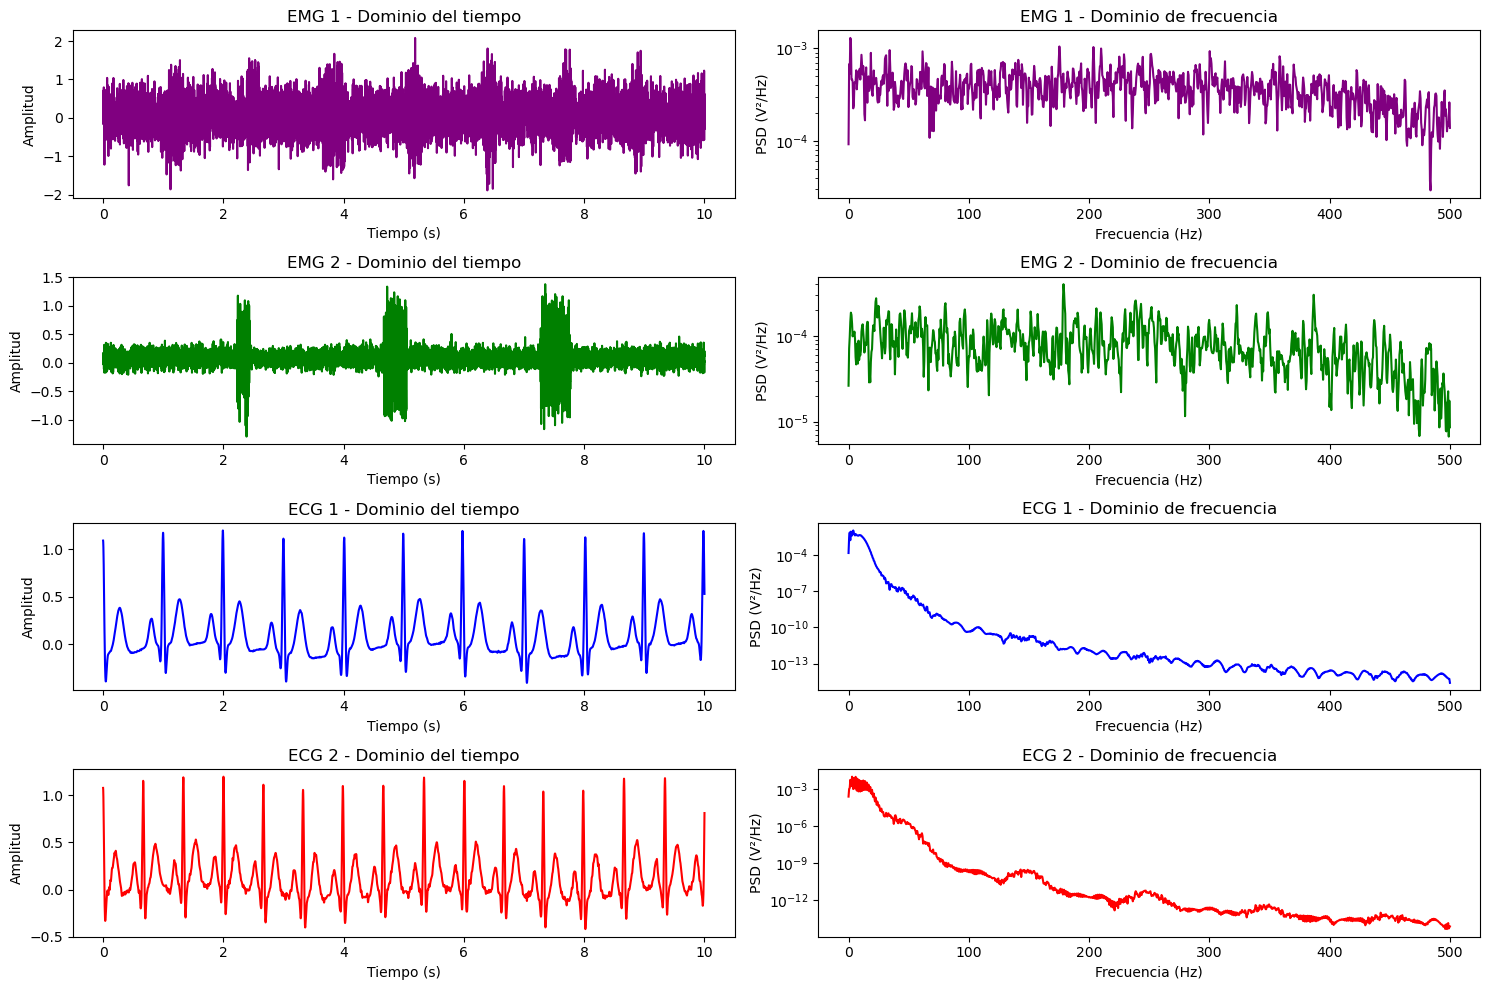

In [8]:
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parámetros generales
sampling_rate = 1000  # Hz
duration = 10  # segundos
length = duration * sampling_rate

# Simulación de señales
burst_durations1 = np.random.uniform(0.1, 0.5, size=7)                  # Duración de actividad muscular entre 0.1 y 0.5 segundos
emg1 = nk.emg_simulate(duration=duration, sampling_rate=sampling_rate,  # Señal EMG con 7 explosiones de actividad muscular y moderado ruido
                       burst_number=7, burst_duration=burst_durations1,
                       noise=0.4)

burst_durations2 = np.random.uniform(0.2, 0.6, size=3)                   # Duración de actividad muscular entre 0.2 y 0.6 segundos
emg2 = nk.emg_simulate(duration=duration, sampling_rate=sampling_rate,   # Señal EMG con 3 explosiones de actividad muscular y bajo ruido
                       burst_number=3, burst_duration=burst_durations2,
                       noise=0.1)

ecg1 = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, # Frecuencia cardiaca 60 bpm
                       heart_rate=60, method="ecgsyn", noise=0.01)
ecg2 = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, # Frecuencia cardiaca alta 90 bmp
                       heart_rate=90, method="ecgsyn", noise=0.05)

# Ploteo del dominio de tiempo
time = np.linspace(0, duration, length)
plt.figure(figsize=(15, 10))

plt.subplot(4, 2, 1);plt.plot(time, emg1, color='purple')
plt.title("EMG 1 - Dominio del tiempo");plt.xlabel("Tiempo (s)");plt.ylabel("Amplitud")

plt.subplot(4, 2, 3);plt.plot(time, emg2, color='green')
plt.title("EMG 2 - Dominio del tiempo");plt.xlabel("Tiempo (s)");plt.ylabel("Amplitud")

plt.subplot(4, 2, 5);plt.plot(time, ecg1, color='blue')
plt.title("ECG 1 - Dominio del tiempo");plt.xlabel("Tiempo (s)");plt.ylabel("Amplitud")


plt.subplot(4, 2, 7);plt.plot(time, ecg2, color='red')
plt.title("ECG 2 - Dominio del tiempo");plt.xlabel("Tiempo (s)");plt.ylabel("Amplitud")

# Ploteo del dominio de frecuencia
def plot_psd(signal, sr, title, color, subplot_index):
    freqs, psd = welch(signal, fs=sr, nperseg=2048)
    plt.subplot(4, 2, subplot_index)
    plt.semilogy(freqs, psd, color=color)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("PSD (V²/Hz)")

plot_psd(emg1, sampling_rate, "EMG 1 - Dominio de frecuencia", 'purple', 2)
plot_psd(emg2, sampling_rate, "EMG 2 - Dominio de frecuencia", 'green', 4)
plot_psd(ecg1, sampling_rate, "ECG 1 - Dominio de frecuencia", 'blue', 6)
plot_psd(ecg2, sampling_rate, "ECG 2 - Dominio de frecuencia", 'red', 8)

plt.tight_layout()
plt.show()

